# Job Market Research

In this notebook I will use a US survey of the job market for software programmers. My goal is to do an initial investigation of the data to detect problems with the data, need for more variables, organizational failures, and transformation needs.

>Salary Survey conducted by https://www.freecodecamp.com/ with software programmers in the US who attended Bootcamp training.

In [29]:
# Importing packages
import numpy as np
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import colorsys
plt.style.use('seaborn-talk')
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
# Loading the dataset
df = pd.read_csv("data/Dados-Pesquisa.csv", sep = ',', low_memory=False)

### _Initial Data View_

In [5]:
display(df.head())

,Age,AttendedBootcamp,BootcampFinish,BootcampFullJobAfter,BootcampLoanYesNo,BootcampMonthsAgo,BootcampName,BootcampPostSalary,BootcampRecommend,ChildrenNumber,...,ResourceSoloLearn,ResourceStackOverflow,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3Schools,ResourceYouTube,SchoolDegree,SchoolMajor,StudentDebtOwe
0,28.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"some college credit, no degree",NaN,20000.0
1,22.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,"some college credit, no degree",NaN,NaN
2,19.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,high school diploma or equivalent (GED),NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Cinematography And Film,7000.0
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"some college credit, no degree",NaN,NaN


In [6]:
df.shape

(15620, 113)

> The dataset has a total of 15620 record data spread over 113 columns.

In [7]:
df.isnull().sum()

Age                      2007
AttendedBootcamp          240
BootcampFinish          14687
BootcampFullJobAfter    14985
BootcampLoanYesNo       14686
                        ...  
ResourceW3Schools       15499
ResourceYouTube         15499
SchoolDegree             1941
SchoolMajor              7170
StudentDebtOwe          12106
Length: 113, dtype: int64

> The set has a lot of missing data in multiple columns.

In [8]:
df.describe()

,Age,AttendedBootcamp,BootcampFinish,BootcampFullJobAfter,BootcampLoanYesNo,BootcampMonthsAgo,BootcampPostSalary,BootcampRecommend,ChildrenNumber,CodeEventBootcamp,...,ResourceReddit,ResourceSkillCrush,ResourceSoloLearn,ResourceStackOverflow,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3Schools,ResourceYouTube,StudentDebtOwe
count,13613.000000,15380.000000,933.000000,635.000000,934.000000,631.000000,330.000000,937.000000,2554.000000,42.0,...,29.0,36.0,30.0,191.0,422.0,3306.0,4130.0,121.0,121.0,3514.000000
mean,29.175714,0.061964,0.689175,0.584252,0.332976,9.055468,63740.506061,0.785486,1.896241,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,34556.143711
std,9.017580,0.241097,0.463080,0.493239,0.471531,12.968035,26347.200265,0.410704,1.115975,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54423.139781
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6000.000000,0.000000,0.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000
25%,23.000000,0.000000,0.000000,0.000000,0.000000,3.000000,50000.000000,1.000000,1.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10000.000000
50%,27.000000,0.000000,1.000000,1.000000,0.000000,6.000000,60000.000000,1.000000,2.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,20000.000000
75%,33.000000,0.000000,1.000000,1.000000,1.000000,12.000000,77000.000000,1.000000,2.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,40000.000000
max,86.000000,1.000000,1.000000,1.000000,1.000000,220.000000,200000.000000,1.000000,18.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1000000.000000


In [9]:
# Listing all columns
list(df)

['Age',
 'AttendedBootcamp',
 'BootcampFinish',
 'BootcampFullJobAfter',
 'BootcampLoanYesNo',
 'BootcampMonthsAgo',
 'BootcampName',
 'BootcampPostSalary',
 'BootcampRecommend',
 'ChildrenNumber',
 'CityPopulation',
 'CodeEventBootcamp',
 'CodeEventCoffee',
 'CodeEventConferences',
 'CodeEventDjangoGirls',
 'CodeEventGameJam',
 'CodeEventGirlDev',
 'CodeEventHackathons',
 'CodeEventMeetup',
 'CodeEventNodeSchool',
 'CodeEventNone',
 'CodeEventOther',
 'CodeEventRailsBridge',
 'CodeEventRailsGirls',
 'CodeEventStartUpWknd',
 'CodeEventWomenCode',
 'CodeEventWorkshop',
 'CommuteTime',
 'CountryCitizen',
 'CountryLive',
 'EmploymentField',
 'EmploymentFieldOther',
 'EmploymentStatus',
 'EmploymentStatusOther',
 'ExpectedEarning',
 'FinanciallySupporting',
 'Gender',
 'HasChildren',
 'HasDebt',
 'HasFinancialDependents',
 'HasHighSpdInternet',
 'HasHomeMortgage',
 'HasServedInMilitary',
 'HasStudentDebt',
 'HomeMortgageOwe',
 'HoursLearning',
 'ID.x',
 'ID.y',
 'Income',
 'IsEthnicMinorit

### _Age Distribution_

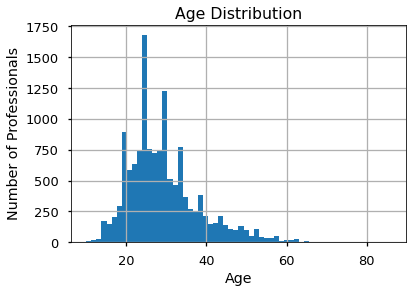

In [14]:
# What is the age distribution of the survey participants?
# Most professionals who work as programmers
# software are between 20 and 30 years old, being 25 years old
# the most frequent age.

# Generating a histogram
df['Age'].hist(bins = 60)
plt.xlabel("Age")
plt.ylabel("Number of Professionals")
plt.title("Age Distribution")
plt.show() 

### _Sex distribution_

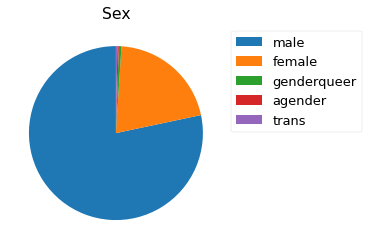

In [24]:
# What is the gender distribution of survey participants?
# The vast majority of programmers are male

# Defining the quantity
labels = df['Gender'].value_counts().index
num = len(df['EmploymentField'].value_counts().index)

# Color map
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
cs = cm.tab10(np.arange(100))


# Pie chart
slices, text = plt.pie(df['Gender'].value_counts(), colors = cs, startangle = 90)
#plt.axes().set_aspect('equal', 'datalim')
plt.legend(slices, labels, bbox_to_anchor = (1,1))
plt.title("Sex")
plt.show()

### _Distribution of interests_

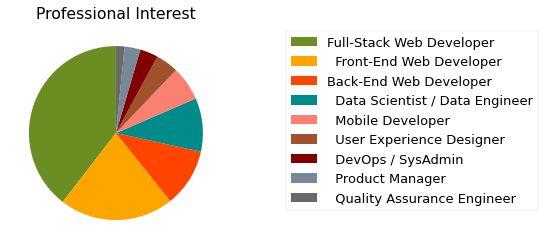

In [44]:
# What are the main interests of research participants?
# The main professional interest of programmers is web development (Full-Stack, Front-End and Back-End),
# followed by the Data Science area.

# Defining the quantity
num = len(df.JobRoleInterest.value_counts().index)

# Creating the color list
labels = df.JobRoleInterest.value_counts().index
colors = ['OliveDrab', 'Orange', 'OrangeRed', 'DarkCyan', 'Salmon', 'Sienna', 'Maroon', 'LightSlateGrey', 'DimGray']

# Pie chart
slices, text = plt.pie(df.JobRoleInterest.value_counts(), colors = colors, startangle = 90)
#plt.axes().set_aspect('equal', 'datalim')
plt.legend(slices, labels, bbox_to_anchor = (1.25, 1))
plt.title("Professional Interest")
plt.show()

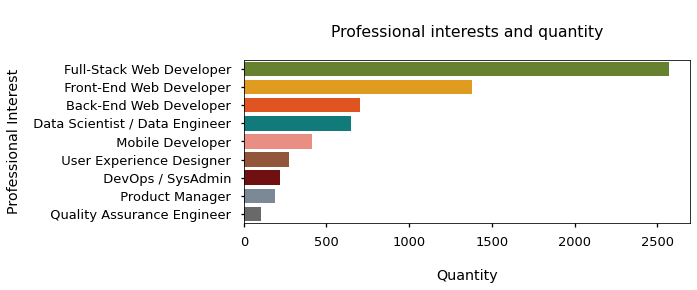

In [45]:
# Plot
plt.figure(figsize = (8,3))
sns.barplot(x = df.JobRoleInterest.value_counts(), y = df.JobRoleInterest.value_counts().index, orient = "h", palette = colors)
plt.ylabel('Professional Interest')             
plt.xlabel("\nQuantity")
plt.title('\nProfessional interests and quantity\n')
plt.show()

### _Employability Distribution_

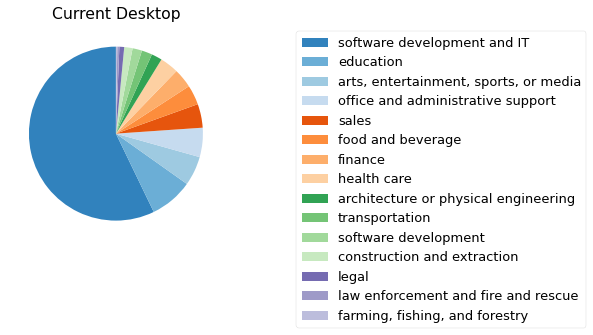

In [51]:
# What areas of business do survey participants work in?
# Most programmers work in the area of development of
# software and IT, but other areas such as finance and healthcare are also
# significant.

# Defining the quantity
num = len(df.EmploymentField.value_counts().index)
labels = df.EmploymentField.value_counts().index

# Pie chart
slices, text = plt.pie(df.EmploymentField.value_counts(), colors = cm.tab20c(np.arange(100)), startangle = 90)
#plt.axes().set_aspect('equal', 'datalim')
plt.legend(slices, labels, bbox_to_anchor = (1.3, 1))
plt.title("Current Desktop")
plt.show()

### _Preferências de Trabalho por Idade_

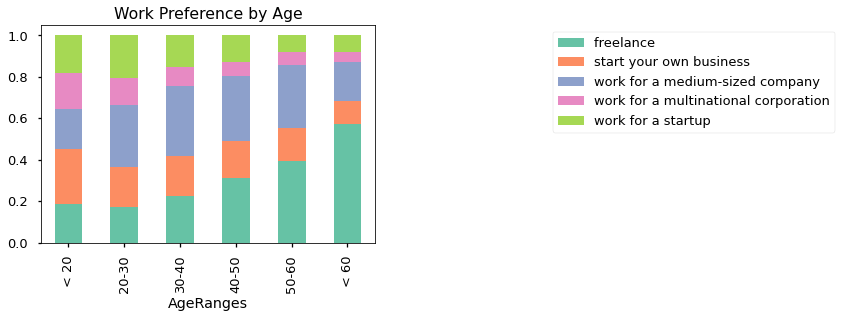

In [55]:
# What are work preferences by age?
# Realize that as age increases, interest in work
# freelance also increases, being the model preferred by professionals
# over 60 years old. Younger professionals prefer to work in
# Startups or your own business. Professionals between 20 and 50 years old
# prefer to work in medium-sized companies.

# Grouping the data
df_ageranges = df.copy()
bins=[0, 20, 30, 40, 50, 60, 100]

df_ageranges['AgeRanges'] = pd.cut(df_ageranges['Age'],
                                   bins,
                                   labels=["< 20", "20-30", "30-40", "40-50", "50-60", "< 60"])

df2 = pd.crosstab(df_ageranges.AgeRanges,
                  df_ageranges.JobPref).apply(lambda r: r/r.sum(), axis=1)

# Defining the quantity
num = len(df_ageranges.AgeRanges.value_counts().index)


# Bar Chart (Stacked)
ax1 = df2.plot(kind = "bar", stacked = True, color = cm.Set2(np.arange(100)), title = "Work Preference by Age")
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines, labels, bbox_to_anchor = (1.51, 1))

### _Reallocation by Age_

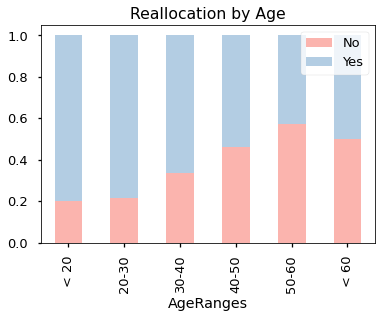

In [59]:
# What is the purpose of relocation?
# The desire to look for a new job decreases with age.
# Almost 80% of people under 30 are prepared for this.

# Grouping the data
df3 = pd.crosstab(df_ageranges.AgeRanges,
                   df_ageranges.JobRelocateYesNo).apply(lambda r: r/r.sum(), axis = 1)

# Defining the quantity
num = len(df_ageranges.AgeRanges.value_counts().index)

# Bar Chart (Stacked)
ax1 = df3.plot(kind = "bar", stacked = True, color = cm.Pastel1(np.arange(100)), title = "Reallocation by Age")
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines,["No", "Yes"], loc = 'best')

### _Age x Learning Hours_

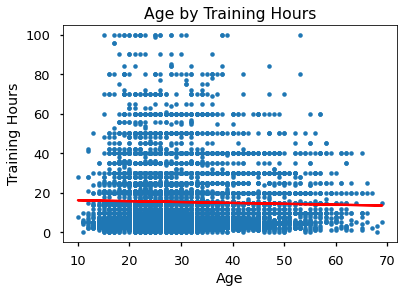

In [61]:
# What is the relationship between age and hours of learning?
# The age of staff does not affect the amount of time spent on training and education.

import warnings
warnings.filterwarnings('ignore')

# Creating data subset
df9 = df.copy()
df9 = df9.dropna(subset=["HoursLearning"])
df9 = df9[df['Age'].isin(range(0,70))]

# Defining x and y values
x = df9.Age
y = df9.HoursLearning

# Computing the values and generating the graph
m,b = np.polyfit(x,y,1)
plt.plot(x, y, '.')
plt.plot(x, m*x + b, '-', color = "red")
plt.xlabel("Age")
plt.ylabel("Training Hours")
plt.title("Age by Training Hours")
plt.show()

### _Investment in Training x Salary Expectation_